<a href="https://colab.research.google.com/github/JoleneShyu/Test-project/blob/main/%E9%81%B8%E5%9D%80KNNtestrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kdnuggets.com/2020/04/introduction-k-nearest-neighbour-algorithm-using-examples.html

In [1]:
import os
os.listdir() #左邊檔案裏要開放連結到我的雲端硬碟,os.listdir()才能抓到'drive',才能找到放在雲端硬碟的檔案路徑
os.listdir('drive/MyDrive/Colab Notebooks')

['「0320_precourse_python.ipynb」的副本',
 '「DataAnalysis.BM101007.ipynb',
 'v3-boston_house_price.ipynb',
 'v3-iris_classification.ipynb',
 '「Colab_Demo_設計你的神經網路.ipynb」-蔡炎龍',
 'Udemy-The Python Mega Course',
 'practice01.ipynb',
 'Untitled',
 'NearBy (1).py',
 'NearBy.py',
 'openstmp_fmChang.ipynb',
 'Untitled0.ipynb',
 'Untitled1.ipynb',
 '「OSM API測試_fmChang.ipynb」',
 'AIA Project']

In [2]:
# Import everything
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create a DataFrame
df = pd.read_excel('drive/MyDrive/Colab Notebooks/AIA Project/選址因子06012_J_data.xlsx')

# Print the head of the data. #df.head() will defaul to first 5 rows
df.head()
df


,業績分類,University,HighSchool,MainCompeteChain,Pharmacy,Attractions,Hospital,IndustyPark,PublicAgency,Transport,HyperMart,Convienence\n,FastFood,OtherCompeteChain\n,Gas/Incinerator,Trail/Substation,Markets
0,0,2,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,3,0,0,0,0,0,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0
106,1,0,0,1,2,0,0,0,0,0,1,1,0,3,1,0,1
107,1,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0
108,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('業績分類', axis=1))
sc_transform = scaler.transform(df.drop('業績分類', axis=1))
sc_df = pd.DataFrame(sc_transform)

# Now you can safely use sc_df as your input features.
sc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,5.776655,-0.333333,-1.123246,-0.400583,1.085889,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,-0.971375,-0.553969,1.037393,-0.280056,0.0,-0.528673
1,-0.304034,-0.333333,1.622467,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,-0.971375,-0.553969,-1.000343,-0.280056,0.0,-0.528673
2,-0.304034,-0.333333,-1.123246,-0.400583,1.085889,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,1.603354,-0.553969,0.018525,-0.280056,0.0,-0.528673
3,-0.304034,-0.333333,-1.123246,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,-0.971375,-0.553969,0.018525,-0.280056,0.0,-0.528673
4,-0.304034,-0.333333,1.622467,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,1.435952,0.315989,1.092966,0.018525,-0.280056,0.0,3.481948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-0.304034,-0.333333,-0.208009,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,1.603354,-0.553969,0.018525,-0.280056,0.0,-0.528673
106,-0.304034,-0.333333,-0.208009,4.783427,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,1.435952,0.315989,-0.553969,2.056261,2.287124,0.0,1.476638
107,-0.304034,-0.333333,-1.123246,2.191422,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,0.315989,-0.553969,1.037393,-0.280056,0.0,-0.528673
108,-0.304034,-0.333333,-0.208009,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,0.315989,-0.553969,-1.000343,-0.280056,0.0,-0.528673


In [4]:
from sklearn.model_selection import train_test_split

X = sc_transform
y = df['業績分類']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Text(0, 0.5, 'Error Rate')

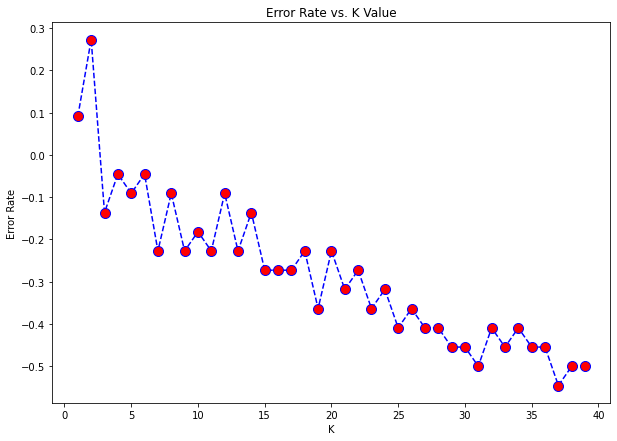

In [5]:
# Initialize an array that stores the error rates.
from sklearn.neighbors import KNeighborsClassifier

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
k = 15
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[4 8]
 [2 8]]
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.50      0.80      0.62        10

    accuracy                           0.55        22
   macro avg       0.58      0.57      0.53        22
weighted avg       0.59      0.55      0.52        22

